In [1]:
import numpy as np
import pandas as pd
df = pd.read_csv('iris.data')
df.columns = ['sepal_len' , 'sepal_wid' , 'petal_len' , 'petal_wid' , 'label']
df.head()

,sepal_len,sepal_wid,petal_len,petal_wid,label
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


<img src="1.png" alt="FAO" width="690" align="left">

In [2]:
from sklearn.preprocessing import LabelEncoder

X = df.iloc[: , 0 : 4].values
y = df.iloc[: , 4].values

enc = LabelEncoder()
label_encoder = enc.fit(y)
y = label_encoder.transform(y) + 1

label_dict = {1: 'Setosa' , 2: 'Versicolor' , 3:'Virginica'}

<img src="2.png" alt="FAO" width="290" align="left">

### 分別求三種鳶尾花數據在不同特征維度上的平均值向量 mi
<img src="3.png" alt="FAO" width="390">

In [3]:
mean_vectors = []
for label in range(1 , 4):
    mean_vectors.append(np.mean(X[y == label] , axis = 0))
    print('Mean Vector label {}: {}\n'.format(label , np.mean(X[y == label] , axis = 0)))

Mean Vector label 1: [5.00408163 3.41632653 1.46530612 0.24489796]

Mean Vector label 2: [5.936 2.77  4.26  1.326]

Mean Vector label 3: [6.588 2.974 5.552 2.026]



### 計算兩個 4×4 維矩陣：類內散布矩陣和類間散布矩陣

<img src="5.png" alt="FAO" width="330" >

In [4]:
S_W = np.zeros((4 , 4))
for label , mean_vector in zip(range(1 , 4), mean_vectors):
    mean_vector = mean_vector.reshape(4 , 1)
    for data in X[y == label]:
        data = data.reshape(4 , 1)
        S_W += np.dot(data - mean_vector , (data - mean_vector).T)
print('within-class Scatter Matrix : \n{}'.format(S_W))

within-class Scatter Matrix : 
[[38.94718367 13.67513469 24.62013878  5.65982041]
 [13.67513469 17.02813878  8.1253551   4.91688163]
 [24.62013878  8.1253551  27.21582041  6.25072653]
 [ 5.65982041  4.91688163  6.25072653  6.17362449]]


圖片顯示計算類間散佈矩陣的作法為近似做法，而本程式作法為則是依據理論的算法

<img src="6.png" alt="FAO" width="430" >

In [5]:
S_B = np.zeros((4 , 4)) 
for i in range(0 , 2):
    for j in range(i + 1 , 3):
        A = (mean_vectors[i] - mean_vectors[j]).reshape(4 , 1)
        B = (mean_vectors[i] - mean_vectors[j]).reshape(1 , 4)
        S_B += np.dot(A , B)
print('between-class Scatter Matrix : \n{}'.format(S_B))       

between-class Scatter Matrix : 
[[ 3.80237324 -1.16992468  9.91980005  4.28501909]
 [-1.16992468  0.65500674 -3.35036992 -1.34377362]
 [ 9.91980005 -3.35036992 26.18064472 11.20456806]
 [ 4.28501909 -1.34377362 11.20456806  4.8311061 ]]


-  <img src="7.png" alt="FAO" width="230" >

In [6]:
S_W_inv = np.linalg.inv(S_W)
eig_values , eig_vectors = np.linalg.eig(np.dot(S_W_inv , S_B))

result = np.dot(S_W_inv , S_B)
print('matmul result :\n{}\n '.format(result)) # 相乘結果不是實對稱矩陣，可能不會有實數特徵值與特徵向量
print('Eigenvectors :\n{}\n'.format(eig_vectors.real))
print('\nEigenvalues : {}'.format(eig_values.real))

matmul result :
[[-0.18209868  0.06280083 -0.48191225 -0.20579477]
 [-0.33806644  0.12882217 -0.90703481 -0.38310916]
 [ 0.48283365 -0.17147056  1.28279557  0.54608937]
 [ 0.64141193 -0.20422408  1.68029062  0.72341858]]
 
Eigenvectors :
[[ 0.20512661 -0.00827236  0.41042957  0.41042957]
 [ 0.38714022 -0.58892737 -0.42106405 -0.42106405]
 [-0.54645287  0.25424869 -0.46792105 -0.46792105]
 [-0.71374701 -0.76710738  0.60407283  0.60407283]]


Eigenvalues : [1.93630258e+00 1.66350618e-02 1.26995756e-16 1.26995756e-16]


### 特徵值與特徵向量：
- 特徵向量：表示映射方向
- 特徵值：特徵向量的重要程度

In [7]:
eig_pairs = {}
for i in range(0 , len(eig_values)):
    eig_pairs[eig_values[i]] = eig_vectors[: , i]
    
# 按照eig_value由大排到小
eig_pairs = sorted(eig_pairs.items() , key = lambda x: x[0] , reverse = True)

# 計算各個eig_value所佔的權重
total = sum(eig_values.real)

eig_weight = []
for i in range(0 , len(eig_values)):
    eig_weight.append(eig_values.real[i] / total)

# 對權重進行累加    
cum_eig_weight = np.cumsum(eig_weight)

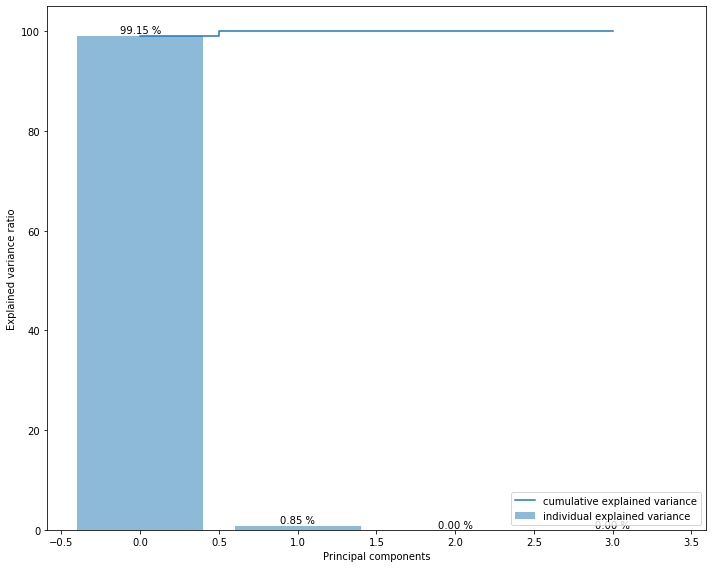

In [9]:
from matplotlib import pyplot as plt

plt.figure(figsize = (10 , 8))

plt.bar(range(4) , 
        np.array(eig_weight) * 100 , 
        alpha = 0.5 , 
        align = 'center',
        label = 'individual explained variance')

for a , b in zip(range(4) , np.array(eig_weight) * 100):  
    plt.text(a , b + 0.005 , '{:.2f} %'.format(b), ha = 'center' , va = 'bottom' , fontsize = 10) 

plt.step(range(4) ,
         np.array(cum_eig_weight) * 100 ,
         where = 'mid' ,
         label = 'cumulative explained variance')

plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

In [10]:
# 取最大與次大的eig_value所對應的eig_vecctor，對X作線性變換

matrix_w = np.hstack((eig_pairs[0][1].real.reshape(4 , 1),
                      eig_pairs[1][1].real.reshape(4 , 1)))
print('Matrix W : \n{}\n'.format(matrix_w))

transform_X = X.dot(matrix_w)
print('Transform X : \n{}'.format(transform_X))

Matrix W : 
[[ 0.20512661 -0.00827236]
 [ 0.38714022 -0.58892737]
 [-0.54645287  0.25424869]
 [-0.71374701 -0.76710738]]

Transform X : 
[[ 1.25875762 -1.60478997]
 [ 1.34980563 -1.74634585]
 [ 1.18128838 -1.63577614]
 [ 1.51155442 -1.95897363]
 [ 1.40306187 -2.21610766]
 [ 1.28070103 -1.91458995]
 [ 1.37948109 -1.81576329]
 [ 1.1174803  -1.54176106]
 [ 1.31420106 -1.56154711]
 [ 1.5776738  -1.99575044]
 [ 1.28381048 -1.78868395]
 [ 1.30961966 -1.527252  ]
 [ 1.37099222 -1.59939043]
 [ 1.93980237 -2.2520122 ]
 [ 1.76746053 -2.56390279]
 [ 1.62164301 -2.31780713]
 [ 1.42197836 -1.97761887]
 [ 1.49726053 -2.08298589]
 [ 1.48347514 -2.12887221]
 [ 1.35224116 -1.7682225 ]
 [ 1.37338641 -2.14669021]
 [ 1.64808492 -2.05736416]
 [ 1.03786505 -1.93698026]
 [ 1.11987462 -1.71240934]
 [ 1.16997971 -1.55476747]
 [ 1.1820864  -1.9437599 ]
 [ 1.45922043 -1.8763105 ]
 [ 1.4751517  -1.84284263]
 [ 1.18586977 -1.67007124]
 [ 1.16766841 -1.61200574]
 [ 1.31878233 -1.97249371]
 [ 1.76287926 -2.15295618]

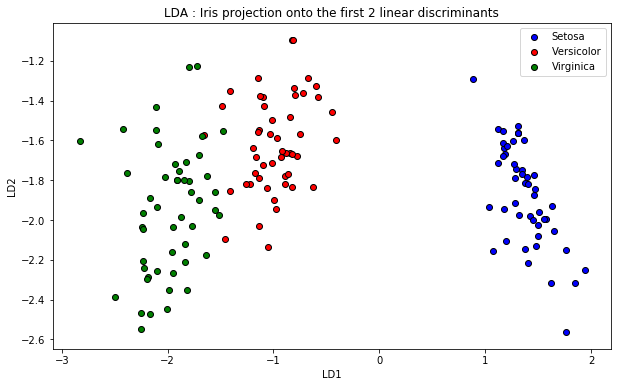

In [11]:
fig , ax = plt.subplots(1 , 1 , figsize = (10 , 6))

for lab , col in zip([1, 2 , 3] , ['blue', 'red', 'green']):
     ax.scatter(transform_X[y == lab , 0] ,
                transform_X[y == lab , 1] ,
                label = label_dict[lab] ,
                c = col ,
                edgecolor = 'black')
ax.set_xlabel('LD1')
ax.set_ylabel('LD2')
ax.set_title('LDA : Iris projection onto the first 2 linear discriminants')
ax.legend(loc = 'best')

對比理論算出來的LDA降維結果與sklearn的LDA結果

In [12]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# sklearn的LDA
sklearn_lda = LDA(n_components = 2)
transform_X_sklearn_lda = sklearn_lda.fit_transform(X , y)

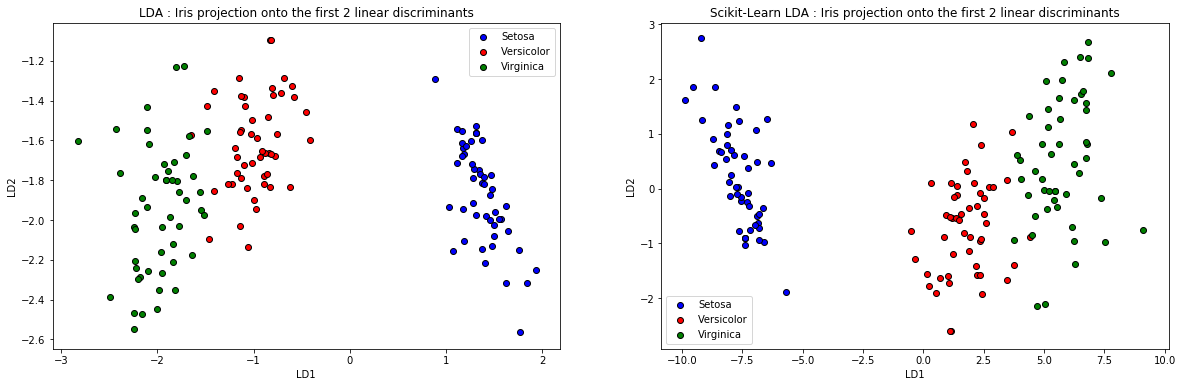

In [13]:
fig , ax = plt.subplots(1 , 2 , figsize = (20 , 6))

# 理論算出來的LDA降維結果
for lab , col in zip([1, 2 , 3] , ['blue', 'red', 'green']):
     ax[0].scatter(transform_X[y == lab , 0] ,
                transform_X[y == lab , 1] ,
                label = label_dict[lab] ,
                c = col ,
               edgecolor = 'black')
ax[0].set_xlabel('LD1')
ax[0].set_ylabel('LD2')
ax[0].set_title('LDA : Iris projection onto the first 2 linear discriminants')
ax[0].legend(loc = 'best')

# sklearn的LDA結果
for lab , col in zip([1, 2 , 3] , ['blue', 'red', 'green']):
     ax[1].scatter(transform_X_sklearn_lda[y == lab , 0] ,
                transform_X_sklearn_lda[y == lab , 1] ,
                label = label_dict[lab] ,
                c = col ,
                edgecolor = 'black')
ax[1].set_xlabel('LD1')
ax[1].set_ylabel('LD2')
ax[1].set_title('Scikit-Learn LDA : Iris projection onto the first 2 linear discriminants')
ax[1].legend(loc = 'best')